<a href="https://colab.research.google.com/github/kyin99/NSAC-CyberScape/blob/master/flood_of_ideas_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [3]:
path = "/content/drive/My Drive/Colab Notebooks/trainfinal.csv"
train_dataset=pd.read_csv(path)
p = "/content/drive/My Drive/Colab Notebooks/testfinal.csv"
test_dataset=pd.read_csv(p)

In [5]:
train_dataset.head()

,RUNUP_HT,DIST_FROM_SOURCE,CAUSE_CODE,TS_INTENSITY,DAMAGE_AMOUNT_ORDER
0,NaN,93.0,0.0,5.0,4.0
1,10.0,137.0,1.0,5.0,4.0
2,NaN,23.0,1.0,5.0,4.0
3,85.4,40.0,1.0,6.0,4.0
4,12.0,131.0,2.0,4.0,4.0


In [6]:
train_features = train_dataset.copy()
train_labels = train_features.pop('DAMAGE_AMOUNT_ORDER')
test_features = test_dataset.copy()
test_labels = test_features.pop('DAMAGE_AMOUNT_ORDER')

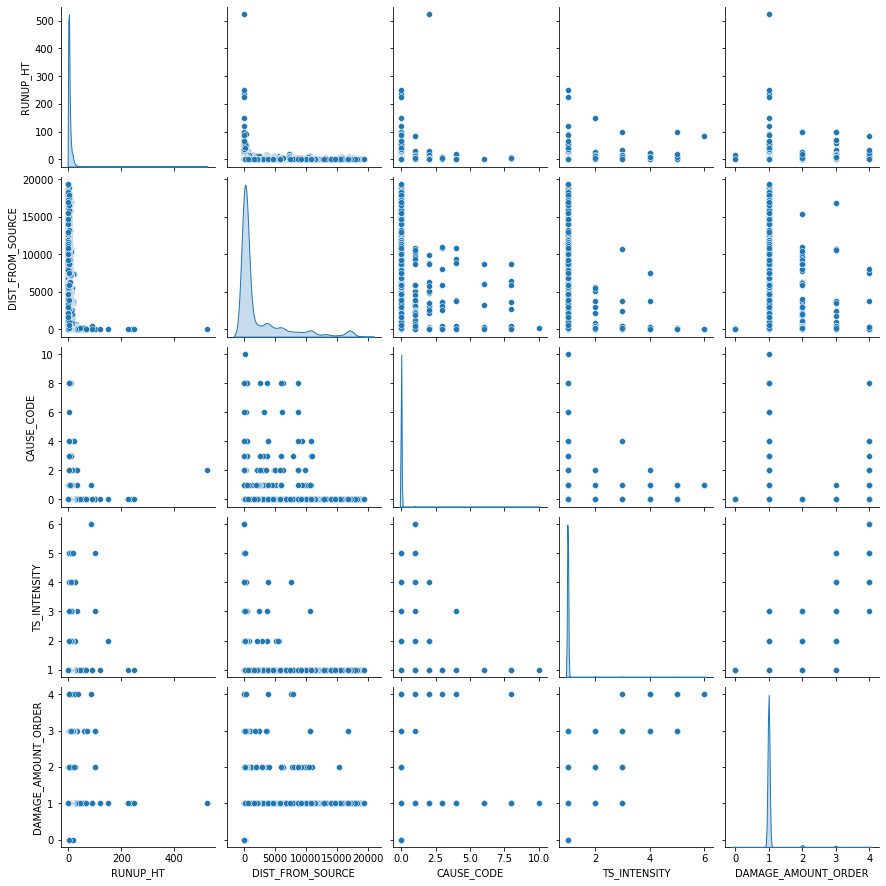

In [8]:
sns.pairplot(train_dataset[['RUNUP_HT','DIST_FROM_SOURCE','CAUSE_CODE','TS_INTENSITY','DAMAGE_AMOUNT_ORDER']], diag_kind='kde')

In [9]:
normalize = tf.keras.layers.experimental.preprocessing.Normalization()
normalize.adapt(np.array(train_features))
print(normalize.mean.numpy())

[ 0.        92.6117     0.         0.9183967]


In [10]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalize(first).numpy())

First example: [[nan 93.  0.  5.]]

Normalized: [[  nan  0.     nan 14.82]]


In [11]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(60,input_dim=3, activation='relu'),
      layers.Dense(30, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [12]:
dnn_model = build_and_compile_model(normalize)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 60)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,170
Trainable params: 2,161
Non-trainable params: 9
_________________________________________________________________


In [19]:
dnn_model.fit(train_features, train_labels, epochs=10, batch_size=50)
dnn_model.save_weights("model.tf")

Epoch 1/10
500/500 [==============================] - 1s 1ms/step - loss: nan
Epoch 2/10
500/500 [==============================] - 1s 1ms/step - loss: nan
Epoch 3/10
500/500 [==============================] - 1s 1ms/step - loss: nan
Epoch 4/10
500/500 [==============================] - 1s 1ms/step - loss: nan
Epoch 5/10
500/500 [==============================] - 1s 1ms/step - loss: nan
Epoch 6/10
500/500 [==============================] - 1s 1ms/step - loss: nan
Epoch 7/10
500/500 [==============================] - 1s 1ms/step - loss: nan
Epoch 8/10
500/500 [==============================] - 1s 1ms/step - loss: nan
Epoch 9/10
500/500 [==============================] - 1s 1ms/step - loss: nan
Epoch 10/10
500/500 [==============================] - 1s 1ms/step - loss: nan


In [14]:
test_predictions = dnn_model.predict(test_features).flatten()

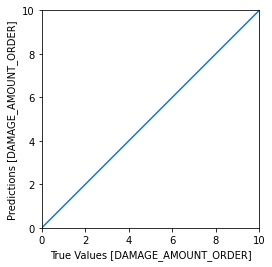

In [15]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [DAMAGE_AMOUNT_ORDER]')
plt.ylabel('Predictions [DAMAGE_AMOUNT_ORDER]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)